<b style='font-size:2em'>Tutorial 1 – Grids and fields</b>

In the first part of the tutorial you will learn how to solve basic partial differential equations using the package <a href="https://github.com/zwicker-group/py-pde">py-pde</a>.

We start by introducing <b>grids</b>, <b>fields</b> and <b>operators</b>. <b>Fields</b> describe the state of the system, e.g. the concentration of a chemical or the temperature. The <b>grid</b> defines the space on which the fields are defined, so on each grid point every field has a defined value. And the <b>operators</b> are functions that can be applied to fields, e.g. gradient operator or laplace operator, and take into account the grid geometry.
    
Afterwards we show how this can be used to solve a diffusion equation for different initial and boundary conditions.

If you have questions regarding the package please ask us or have a look at the documentation <a href="https://py-pde.readthedocs.io/en/latest/">package Documentation</a>.

In [76]:
''' Import the packages that we need for this tutorial '''
import sys          # sys allows us to add paths to packages
import numpy as np  # numpy 
import matplotlib.pyplot as plt

#sys.path.append('../..')  # add the pde package to the python path
sys.path.append('/Users/jankirschbaum/Documents/GitHub/D2/py-pde')
import pde

## Basic grids

We start by defining the space and its discretization. The total space is divided in smaller cells that are equally spaced. The space between two cells is called discretization. The simplest variant is a rectangular geometry with discretization 1 in all dimeensions, which we call a `UnitGrid`. Cells with unequal sizes are supported by the more complex `CartesianGrid`.

The inbuild function `grid.plot()` plots the grid without having to extract the data. You get the coordinate arrays of the grid using the `grid.axes_coords` function in the form of two arrays, the first for the x- and the second for the y-direction .

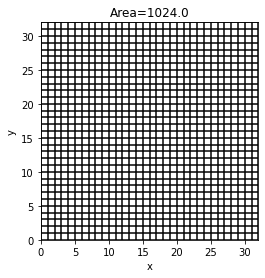

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]))

In [20]:
grid = pde.UnitGrid([32, 32])
grid.plot(title=f'Area={grid.volume}')
grid.axes_coords

<b>Question:</b> The function `pde.UnitGrid` takes one argument, [32,32]. What is the meaning of this argument?<br>
Change the square into a rectangle with unequal sidelength.<br>

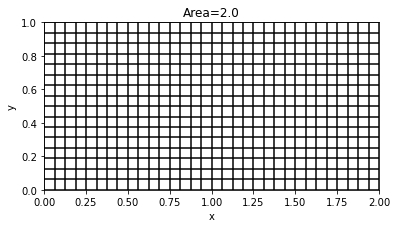

In [21]:
grid = pde.CartesianGrid(bounds=[[0, 2], [0, 1]], shape=[32, 16])
grid.plot(title=f'Area={grid.volume}')

<b>Question:</b> What is the discretization (the sidelength of each grid cell) of this grid in x- and y-direction? Are grid cells necessarily squares?<br>
Use Use `pde.CartesianGrid?` to get informations about the usage of the function (This works for every function, not only `CartesianGrid`)

Besides rectangular grids, we support a small set of curvilinear (yet still orthogonal) coordinate systems: `PolarSymGrid` on a disk, `SphericalSymGrid` in a ball, and `CylindricalSymGrid` in an axisymmetric cylinder. All these grids have in common that they assume that fields do not depend on the angular variables, i.e., they enforce symmetry.

<b>Question:</b> How many variables are necessary to describe `PolarSymGrid`, `SphericalSymGrid` and `CylindricalSymGrid` when the symmetry discussed above is enforced?

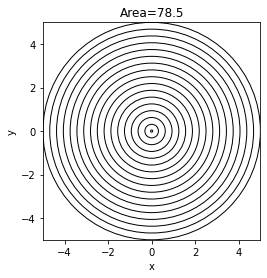

In [7]:
grid = pde.PolarSymGrid(radius=5, shape=16)
grid.plot(title=f'Area={grid.volume:.3g}')

`PolarSymGrid` and `SphericalSymGrid` also support annuli. The two radii can be specified by a supplying a tuple to the `radius` argument.

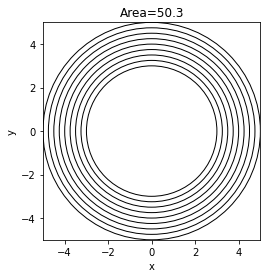

In [5]:
grid = pde.PolarSymGrid(radius=(3, 5), 8)
grid.plot(title=f'Area={grid.volume:.3g}')

In [28]:
grid = pde.CylindricalSymGrid(radius=5, bounds_z=[0,16] , shape=[15,16])

<b>Question:</b> How would you plot a grid with cylindrical symmetry?

## Scalar fields
Scalar fields represent scalar quantities that depend on position, e.g. temperature, concentration or energy. In this package, scalar fields are represented by their values at each grid point discussed above. Consequently, one first has to construct a grid and pass it to the `ScalarField` class to construct a scalar field.

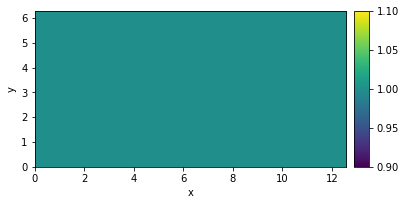

In [38]:
grid = pde.CartesianGrid([[0, 4*np.pi], [0, 2*np.pi]], [128, 32])

field = pde.ScalarField(grid, data=1)
field.plot()

<b>Question:</b> Define a `ScalarField` on a `PolarSymGrid` and plot it. (Use another name than `grid` for your newly defined `PolarSymGrid`, the `CartesianGrid` will be needed later.)

Scalar fields support a range of mathematical operations and can thus roughly used like bare numpy arrays. The actual underlying data of the field is accessed by its `.data` attribute.<br>
But Scalar fields have more advanced functionalities as well, for example `field.interpolate` uses linear interpolation to calculate the value of a scalar field at points in space that are <b>not</b> lattice points.<br>
And the function `field.average` gives the average value of the field.

In [52]:
field += 4
print(field.data)

print(f'Find the value of the field at point (2.1,0.3) not on the grid:', field.interpolate([2.1, 0.3]))

print(f'Average value of the field: {field.average:.3f}')

[[ 2.77631397  2.55888957  4.35224719 ...  4.5182715   2.98699104
   3.26392026]
 [ 9.25734518  7.75470517  0.49892436 ...  7.92715802  6.51715165
   2.71562756]
 [ 7.74056066  4.2849087   7.41095602 ...  1.01922306  3.41047813
   5.33635821]
 ...
 [ 8.94539555  4.06882278 -0.64452844 ...  6.50294029  4.32174249
   6.41257491]
 [ 8.51838804  1.22220353  8.17885734 ... -1.59698814 11.63250406
   0.62032946]
 [ 6.37033173  0.01935131 10.24508609 ...  1.13067653 -0.60837052
   3.80054778]]
Find the value of the field at point (2.1,0.3) not on the grid: 9.297524345217662
Average value of the field: 4.574


<b>Question</b> As discussed above you can manipulate `field.data` like any numpy array use this to implement the scalar field $f(x,y)=0.5\cdot x+y$ and plot it.

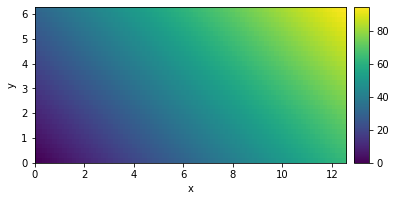

In [63]:
x,y = grid.axes_coords

for i in range(len(x)):
    for j in range(len(y)):
        field.data[i,j] = 0.5*i+j
field.plot()

There are a range of methods to initialize scalar fields. For instance, various random fields can be initiated using the `ScalarField.random_*()` methods. The easiest one, `ScalarField.random_normal(grid,mean,std)` draws random numbers from a Gaussian distribution with mean and standard deviation (std) specified by the respective arguments.

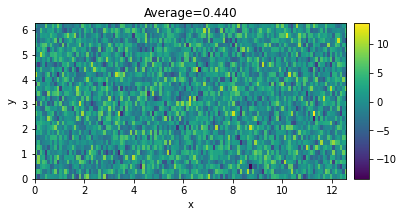

In [66]:
field = pde.ScalarField.random_normal(grid,mean=0.5,std=0.5)
field.plot(title=f'Average={field.average:.3f}', colorbar=True);

Fields can be further analyzed by slicing or projeting them along given axes. Slicing uses interpolation to calculate field values at positions that might not lie on the original grid. In contrast, projecting integrates over the given axes, which are thereby removed.

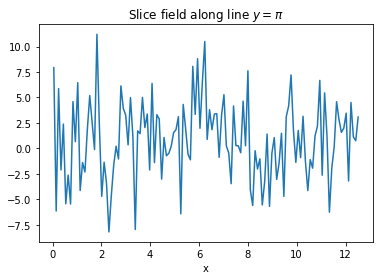

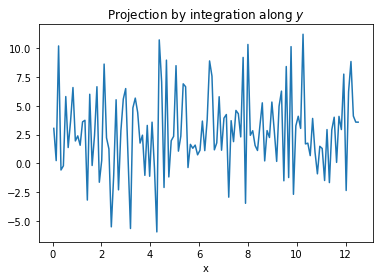

In [67]:
slice_x = field.slice({'y': np.pi})
slice_x.plot(title='Slice field along line $y=π$');

project_x = field.project('y')
project_x.plot(title='Projection by integration along $y$');

Finally, fields can also be created from mathematical expressions that are parsed using `sympy`. Note that this general method is unsafe to process user-supplied data, since it uses the `exec` function.

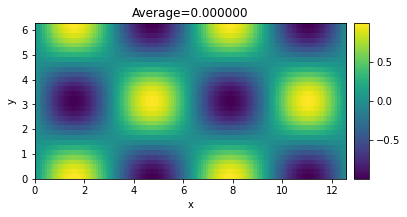

In [69]:
field = pde.ScalarField.from_expression(grid, 'sin(x) * cos(y)')
field.plot(title=f'Average={field.average:f}', colorbar=True);

<b>Question:</b> Use this method to implement $f(x,y)=0.5\cdot x+y$. And try your own function using e.g. exponentials `exp`, etc.

## Field collections
Many partial differential equations combine several fields, which can be represented as a collection.

In [89]:
grid_pol = pde.PolarSymGrid([2, 7], 32)
scalar_field1 = pde.ScalarField.from_expression(grid_pol, 'r**2', label='Increasing')
scalar_field2 = pde.ScalarField.from_expression(grid_pol, '1/r', label='Decreasing')
collection = pde.FieldCollection([scalar_field1, scalar_field2])
collection.attributes

{'class': 'FieldCollection',
 'label': None,
 'fields': [{'class': 'ScalarField',
   'grid': PolarSymGrid(radius=(2, 7), shape=(32,)),
   'label': 'Increasing'},
  {'class': 'ScalarField',
   'grid': PolarSymGrid(radius=(2, 7), shape=(32,)),
   'label': 'Decreasing'}]}

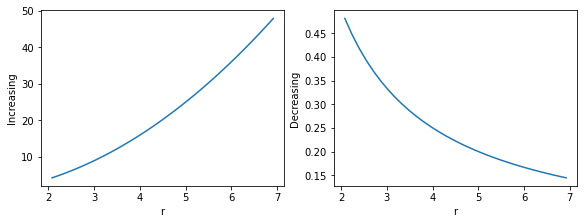

In [90]:
collection.plot();

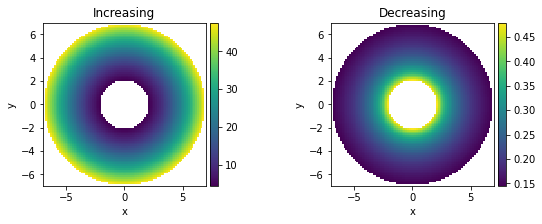

In [91]:
collection.plot('image');
(collection[0] + collection[1]).plot('image');

## Differential operators for scalar fields
Various differential operators can be applied to fields. These differential operators are just-in-time compiled using `numba`. Consequently, their first evaluation can take quite long, since code needs to be analyzed and compiled. However, each subsequent evaluation will be very fast.

Note that differential operators require boundary conditions to be well-defined. For a 2 dimensional rectengular grid defined by $x\in[0,x_{max}$ and $y\in[0,y_{max}$ the boundaries are the lines $x=0,x_{max}$ and $y=0,y_{max}$. Boundary conditions can be specified in a variety of formats, as shown by some examples below. More information on the various formats can be found in <a href="https://py-pde.readthedocs.io/en/latest/packages/pde.grids.boundaries.html#boundary-conditions">the documentation</a>.

We start by applying the laplace operator $\nabla^2 = \partial_x^2 + \partial_y^2$ to the field $f(x,y)=\sin(x)*\cos(y)$ introduced above. First we use periodic boundary conditions, which are defined by $\partial^2_x f(0,y)=\partial_x^2f(x_{max},y)$ and $\partial_y^2f(x,0)=\partial_y^2f(x,y_{max})$. This means that the neighboring points of $x=0$ are $x=1$ and $x=x_{max}$, so the space is periodic with a period $x_{max}$ and $y_{max}$.

Note that periodic boundary conditions are a special case, since they also affect how distances are measured in the defined space. Consequently, periodic boundary conditions need to be already declared on the <b>grid</b> instance. While other boundary conditions are defined for the <b>operators</b>

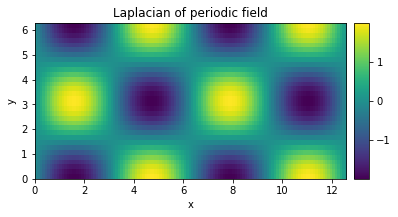

In [84]:
grid_per = pde.CartesianGrid([[0, 4*np.pi], [0, 2*np.pi]], [128, 32], periodic=True)
field_per = pde.ScalarField.from_expression(grid_per, 'sin(x) * cos(y)')
laplace_per = field_per.laplace('periodic')
laplace_per.plot(title='Laplacian of periodic field', colorbar=True);

<b>Question:</b> What is the analytical solution of $\nabla^2(\sin(x)+\cos(y)$? Do the anlytical and numerical solution coincide?

Next we apply Dirichlet boundary conditions in x- and y-direction. Dirichlet boundary conditions fix the values of the function on the boundary $f(0,y)=a_1,\, f(x_{max},y)=a_2,\, f(x,0)=b_1,\, f(x,y_{max})=b_2$. In the example below the value of $f$ vanishes on all boundaries.

Note that we have to define the `grid` again to make sure it is not `periodic` anymore.

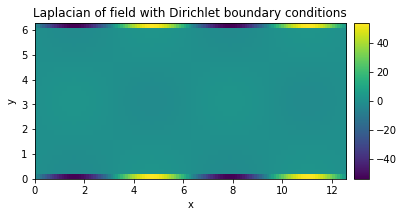

In [86]:
grid = pde.CartesianGrid([[0, 4*np.pi], [0, 2*np.pi]], [128, 32])
field = pde.ScalarField.from_expression(grid, 'sin(x) * cos(y)')

bc_x = ({"value": 0}, {"value": 0})
bc_y = ({"value": 0}, {"value": 0})

laplace_dir = field.laplace(bc=[bc_x, bc_y])
laplace_dir.plot(title='Laplacian of field with Dirichlet boundary conditions', colorbar=True);

The last standard boundary condition is the (von) Neumann boundary condition. Here not the value of the function is specified, but the outwards pointing gradient of the function, which in our case is $\partial_x f(0,y),\, \partial_x f(x_{max},y),\, \partial_y f(x,0),\,\partial_y f(x,y_{max})$. In the example we use vanishing derivatives for all boundaries which can be written in a more compact form than the example above.

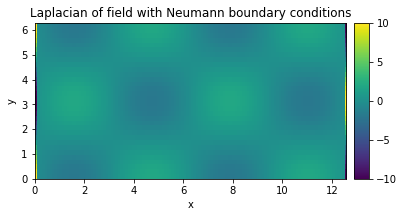

In [87]:
laplace_neu = field.laplace({'derivative': 0})
laplace_neu.plot(title='Laplacian of field with Neumann boundary conditions', colorbar=True);

Note that the Laplace operator results in large values at the boundary where the supplied boundary condition is incompatible with the actual field data. In this case, this can be fixed by imposing Dirichlet conditions along the $x$-axis and Neumann conditions along the $y$-axis:

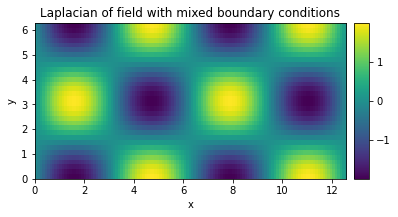

In [88]:
laplace_mix = field.laplace([{'value': 0}, {'derivative': 0}])
laplace_mix.plot(title='Laplacian of field with mixed boundary conditions', colorbar=True);

Periodic and non-periodic axes can also be mixed as in the example below. In this case, the $x$-axis is periodic and thus requires periodic boundary conditions. Conversely, the $y$-axis is non-periodic and any other boundary condition can be specified. The most generic one is a Neumann condition of vanishing derivative. For convenience, we also define `natural` boundary conditions, which indicate periodic conditions for periodic axes and Neumann conditions otherwise.

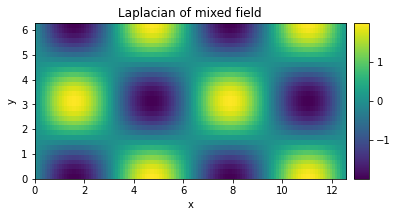

In [92]:
grid_mixed = pde.CartesianGrid([[0, 4*np.pi], [0, 2*np.pi]], [128, 32], periodic=[True, False])
field_mixed = pde.ScalarField.from_expression(grid_mixed, 'sin(x) * cos(y)')

laplace_mixed = field_mixed.laplace(['periodic', {'derivative': 0}])
# laplace_mixed = field_mixed.laplace('natural')
laplace_mixed.plot(title='Laplacian of mixed field', colorbar=True);

### Solving a diffusion equation
We have introduced <b>scalar fields $f(x,y)$</b> that are defined on <b>grids</b> as well as <b>operators</b> that perform differential operations on those fields subject to <b>boundary conditions</b>. We can use this to describe the time evolution of $f(x,y,t)$ starting from an <b>initial condition</b> $f(x,y,0)$ using partial differential equations.

As an example we use the diffusion equation defined by

$\partial_t f(x,y,t) = D\nabla^2 f(x,y,t)$, 

where $D$ is the diffusivity with units length squared over time $[L^2/T]$

To do this we have to define the right hand side of the equation, called the `evolution_rate`, as a method in our PDE class. `evolution_rate` takes the current state $f(x,y,t)$ as an argument, calculates $\nabla^2 f$ and returns $D\nabla^2 f$. 

In [99]:
class Diffusion(pde.PDEBase):
    """ PDE class to define the diffusion equation """

    def evolution_rate(self, state, t=0):
        """ Method to determine the evolution rate for the diffusion equation """
        state_lap = state.laplace({'derivative': 0})
        return D * state_lap

D = 1

Next we define the `grid`, `field` and an instance of our new class `eq=Diffusion()`. The equation can then be solved for a total time `t_range` with a time step `dt`.

<b>Question:</b> Starting from a `random_normal` Play around with the time step, total time and diffusivity 

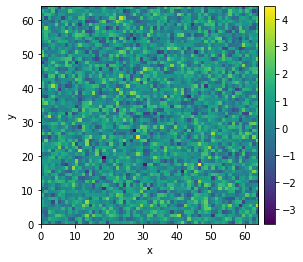

  0%|          | 0/10.0 [00:00<?, ?it/s]

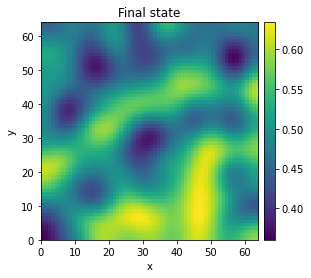

In [102]:
grid = pde.UnitGrid([64, 64])
state = pde.ScalarField.random_normal(grid,mean=0.5,std=1)
state.plot();

eq = Diffusion()
result = eq.solve(state, t_range=10, dt=0.1)
result.plot(title='Final state');

In 

### Maybe do this later

In [ ]:
field = pde.ScalarField.random_colored(grid, exponent=-4, label='Random field')
field.plot();

Fields can be written to files using the optional `h5py` package to write the data in the Hierarchical Data Format (HDF). Note that the underlying grid is also stored in the file and recreated transparently when the file is read using the `ScalarField.from_file()` method.

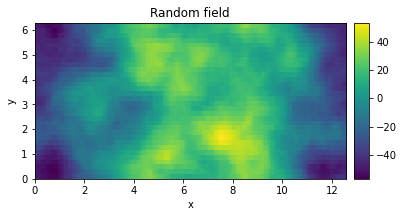

In [50]:
field.to_file('random_field.hdf')

field_loaded = pde.ScalarField.from_file('random_field.hdf')
field_loaded.plot();